### 栅格数据转换为矢量数据


In [1]:
from osgeo import gdal
from osgeo import osr, ogr
import matplotlib.pyplot as plt


In [2]:
path_mndwi = 'data/Section-5/s2_chenggong_mndwi_thre025.tif'
dset = gdal.Open(path_mndwi)
mndwi_band = dset.GetRasterBand(1)
mndwi_array = mndwi_band.ReadAsArray()
print(mndwi_array.shape)


(1630, 1490)


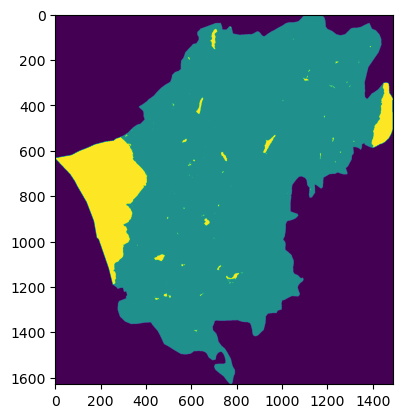

In [3]:
plt.imshow(mndwi_array)


### 主要函数：gdal.Polygonize()
https://gdal.org/api/python/osgeo.gdal.html   
#### 用法：gdal.Polygonize(srcBand, maskBand, outLayer, iPixValField)   
其中主要参数srcBand为输入数据波段，maskBand为掩膜波段（只对掩膜区域处理），outLayer为矢量化后的矢量图层，iPixValField为需要将DN值写入矢量字段的索引。


In [4]:
path_mndwi2polygon = 'data/Section-5/s2_chenggong_mndwi_thre025_polygon.shp'
### 创建空矢量
prj = osr.SpatialReference()
prj.ImportFromWkt(dset.GetProjection())  # 读取栅格数据的投影信息，用来为后面生成的矢量做准备
driver_vec = ogr.GetDriverByName("ESRI Shapefile")
ds_vec = driver_vec.CreateDataSource(path_mndwi2polygon)  # 创建一个目标文件
poly_layer = ds_vec.CreateLayer('mndwi_polygon', srs=prj, geom_type=ogr.wkbMultiPolygon)  # 对shp文件创建一个图层，定义为多个面类
Field_DN = ogr.FieldDefn('DN', ogr.OFTInteger)  # 定义要素字段
poly_layer.CreateField(Field_DN)
gdal.Polygonize(srcBand=mndwi_band, maskBand=None, outLayer=poly_layer, iPixValField=0)   # 核心函数，执行的就是栅格转矢量操作
### 删除除特定DN值的其他矢量要素
DN_vec = [1]
for fea in poly_layer:
    DN_value = fea.GetField('DN')
    if DN_value not in DN_vec:
        poly_layer.DeleteFeature(fea.GetFID())

ds_vec = None  ## 保存并关闭文件


### 快捷方式：gdal_polygonize.py   
参考：https://gdal.org/programs/gdal_polygonize.html）  

In [5]:
### 具有局限性，无法对特定DN值的像素进行矢量化。
# !gdal_polygonize.py -nomask $path_img $path_img2polygon

